<a href="https://colab.research.google.com/github/difurka/mlbookcamp_learning/blob/main/mlzoomcamp_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-01 12:34:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.07s   

2023-10-01 12:34:58 (19.7 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [116]:
import pandas as pd

In [117]:
df1 = pd.read_csv('/content/data.csv')

In [118]:
df1.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [119]:
df = df1[['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg']]
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 837.8+ KB


In [121]:
df['engine_cylinders'].fillna(0, inplace=True)
df['engine_hp'].fillna(0, inplace=True)


<ipython-input-121-40b36c062793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_cylinders'].fillna(0, inplace=True)
<ipython-input-121-40b36c062793>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_hp'].fillna(0, inplace=True)


In [122]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
dtype: int64

In [123]:
target = df1.MSRP
target

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11914, dtype: int64

In [124]:
df.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

In [125]:
df.corr()

<ipython-input-125-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


<ipython-input-126-0bf8f3069900>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),


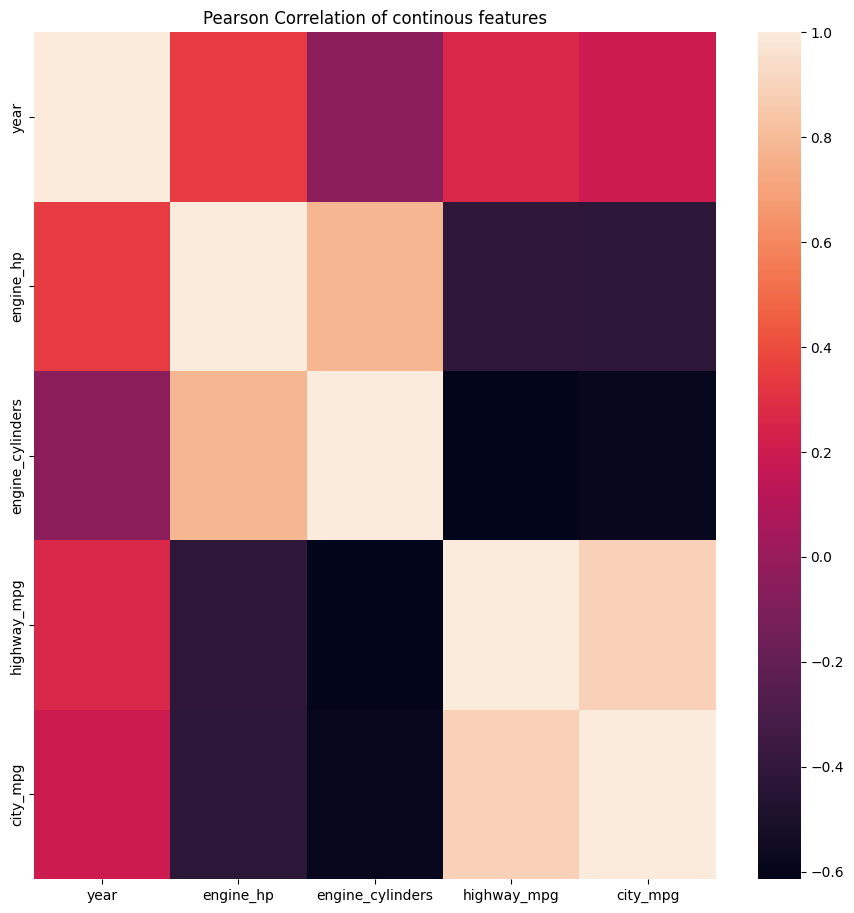

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(11, 11))
plt.title('Pearson Correlation of continous features')
ax = sns.heatmap(df.corr(),
                #  annot=True,
                #  linewidths=.5,
                #  cmap="YlGnBu",
                #  square=True
                );

In [127]:
mea = target.mean()

In [128]:
target = (target>mea)

In [129]:
target

0         True
1         True
2        False
3        False
4        False
         ...  
11909     True
11910     True
11911     True
11912     True
11913    False
Name: MSRP, Length: 11914, dtype: bool

In [130]:
target = target.astype(int)
target

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: MSRP, Length: 11914, dtype: int64

In [131]:
df['price'] = target
df

<ipython-input-131-07980762ca6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = target


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


In [132]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
print(len(df_train), len(df_val), len(df_test))
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

7148 2383 2383


In [133]:
from sklearn.metrics import mutual_info_score

In [134]:
def mutual_info_churn_score(series):
    return round(mutual_info_score(series, df.price), 2)

mi = df.apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

price                0.59
model                0.46
engine_hp            0.36
make                 0.24
engine_cylinders     0.11
vehicle_style        0.08
year                 0.07
city_mpg             0.06
highway_mpg          0.04
transmission_type    0.02
dtype: float64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [136]:
for col in df.columns:
  print(col, df[col].nunique(), df[col].dtypes)

make 48 object
model 915 object
year 28 int64
engine_hp 357 float64
engine_cylinders 9 float64
transmission_type 5 object
vehicle_style 16 object
highway_mpg 59 int64
city_mpg 69 int64
price 2 int64


In [137]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical = list(df.dtypes[df.dtypes == 'int64'].index)
len(categorical)

4

In [138]:
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train.to_dict(orient='records')
train_dict[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 19,
 'city_mpg': 15}

In [139]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [148]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [149]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]

In [142]:
len(y_pred)

2383

In [143]:
y_pred

array([0.0087346 , 0.99033279, 0.00157489, ..., 0.00145975, 0.97178288,
       0.96248167])

In [150]:
decision = (y_pred >= 0.5)
accuracy = round((y_val == decision).mean(), 2)
accuracy

0.93

In [155]:
from re import X
cols_for_check = ['year',
                'engine_hp',
                'transmission_type',
                'city_mpg']

for col in cols_for_check:
  df1_train = df_train.copy()
  df1_val = df_val.copy()
  del df1_train[col]
  del df1_val[col]

  train_dict = df1_train.to_dict(orient='records')
  x_train = dv.fit_transform(train_dict)

  val_dict = df1_val.to_dict(orient='records')
  x_val = dv.transform(val_dict)

  model.fit(x_train, y_train)
  y_pred = model.predict_proba(x_val)[:, 1]

  decision = (y_pred >= 0.5)
  accuracy_little = round((y_val == decision).mean(), 4)
  print(col, accuracy - accuracy_little)



year -0.018399999999999972
engine_hp -0.0050000000000000044
transmission_type -0.014999999999999902
city_mpg -0.015899999999999914


In [157]:
df1.MSRP

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11914, dtype: int64

In [163]:
df['price_d'] = df1.MSRP
del df['price']

<ipython-input-163-c6349649bd9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_d'] = df1.MSRP


In [164]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price_d
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [170]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
print(len(df_train), len(df_val), len(df_test))
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.price_d.values
y_val = df_val.price_d.values
y_test = df_test.price_d.values

del df_train['price_d']
del df_val['price_d']
del df_test['price_d']

7148 2383 2383


In [178]:
al = [0, 0.01, 0.1, 1, 10]
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

train_dict = df_train.to_dict(orient='records')
x_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
x_val = dv.transform(val_dict)

for a in al:
  model = Ridge(alpha=a, solver='sag', random_state=42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_val)

  mse = mean_squared_error(y_val, y_pred)
  print(a, ": ", mse)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 :  2818627039.6604986


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 :  2818628560.113851


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 :  2818642243.694463


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 :  2818779036.494967
10 :  2820142686.0776234


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [179]:
min([2818627039.6604986, 2818628560.113851, 2818642243.694463,  2818779036.494967, 2820142686.0776234])

2818627039.6604986